# Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, f1_score
from scipy.stats import ttest_ind, chi2_contingency, pearsonr
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
# Configure pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Don't truncate column values

CompanyData =pd.read_csv("data.csv")
CompanyData

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                                  0.370594   
1             1                                                  0.464291   
2             1                                                  0.426071   
3             1                                                  0.399844   
4             1                                                  0.465022   
...         ...                                                       ...   
6814          0                                                  0.493687   
6815          0                                                  0.475162   
6816          0                                                  0.472725   
6817          0                                                  0.506264   
6818          0                                                  0.493053   

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                               0.405750   
1                                               0.516730   
2                                               0.472295   
3                                               0.457733   
4                                               0.522298   
...                                                  ...   
6814                                            0.543230   
6815                                            0.524172   
6816                                            0.520638   
6817                                            0.554045   
6818                                            0.549548   

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

# Problem Statement

The fintech firm is transitioning into an AI-first strategy, necessitating a deep analysis of its financial data to improve operational efficiency and support informed decision-making. <br> 
The goal is to develop predictive models and clustering strategies that align with the firm's objectives. <br>

The financial dataset contains 96 attributes and 6819 rows, and we aim to leverage it to extract meaningful insights, forecast trends, classify key elements, and support actionable recommendations.

**Objective** <br>
Analyze and preprocess financial data.<br>
Devise data-driven strategies for forecasting, classification, regression, and clustering.<br>
Engineer features aligned with AI-driven business goals.<br>
Build, evaluate, and refine models to ensure data quality and actionable insights.<br>

# Data Preprocessing

In [5]:
CompanyData

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                                  0.370594   
1             1                                                  0.464291   
2             1                                                  0.426071   
3             1                                                  0.399844   
4             1                                                  0.465022   
...         ...                                                       ...   
6814          0                                                  0.493687   
6815          0                                                  0.475162   
6816          0                                                  0.472725   
6817          0                                                  0.506264   
6818          0                                                  0.493053   

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                               0.405750   
1                                               0.516730   
2                                               0.472295   
3                                               0.457733   
4                                               0.522298   
...                                                  ...   
6814                                            0.543230   
6815                                            0.524172   
6816                                            0.520638   
6817                                            0.554045   
6818                                            0.549548   

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [5]:
CompanyData.rename(columns={' Debt ratio %': 'Debt ratio Percent'}, inplace=True) # Rename column due to error from special character

In [3]:
CompanyData.info() # No null data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
CompanyData.isnull().sum() # No null data

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [12]:
CompanyData.duplicated().sum() # No duplicated data

0

In [13]:
CompanyData.describe().T

count      mean  \
Bankrupt?                                                 6819.0  0.032263   
 ROA(C) before interest and depreciation before interest  6819.0  0.505180   
 ROA(A) before interest and % after tax                   6819.0  0.558625   
 ROA(B) before interest and depreciation after tax        6819.0  0.553589   
 Operating Gross Margin                                   6819.0  0.607948   
...                                                          ...       ...   
 Liability to Equity                                      6819.0  0.280365   
 Degree of Financial Leverage (DFL)                       6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to EBIT)       6819.0  0.565358   
 Net Income Flag                                          6819.0  1.000000   
 Equity to Liability                                      6819.0  0.047578   

                                                               std  min  \
Bankrupt?                                                 0.176710  0.0   
 ROA(C) before interest and depreciation before interest  0.060686  0.0   
 ROA(A) before interest and % after tax                   0.065620  0.0   
 ROA(B) before interest and depreciation after tax        0.061595  0.0   
 Operating Gross Margin                                   0.016934  0.0   
...                                                            ...  ...   
 Liability to Equity                                      0.014463  0.0   
 Degree of Financial Leverage (DFL)                       0.015668  0.0   
 Interest Coverage Ratio (Interest expense to EBIT)       0.013214  0.0   
 Net Income Flag                                          0.000000  1.0   
 Equity to Liability                                      0.050014  0.0   

                                                               25%       50%  \
Bankrupt?                                                 0.000000  0.000000   
 ROA(C) before interest and depreciation before interest  0.476527  0.502706   
 ROA(A) before interest and % after tax                   0.535543  0.559802   
 ROA(B) before interest and depreciation after tax        0.527277  0.552278   
 Operating Gross Margin                                   0.600445  0.605997   
...                                                            ...       ...   
 Liability to Equity                                      0.276944  0.278778   
 Degree of Financial Leverage (DFL)                       0.026791  0.026808   
 Interest Coverage Ratio (Interest expense to EBIT)       0.565158  0.565252   
 Net Income Flag                                          1.000000  1.000000   
 Equity to Liability                                      0.024477  0.033798   

                                                               75%  max  
Bankrupt?                                                 0.000000  1.0  
 ROA(C) before interest and depreciation before interest  0.535563  1.0  
 ROA(A) before interest and % after tax                   0.589157  1.0  
 ROA(B) before interest and depreciation after tax        0.584105  1.0  
 Operating Gross Margin                                   0.613914  1.0  
...                                                            ...  ...  
 Liability to Equity                                      0.281449  1.0  
 Degree of Financial Leverage (DFL)                       0.026913  1.0  
 Interest Coverage Ratio (Interest expense to EBIT)       0.565725  1.0  
 Net Income Flag                                          1.000000  1.0  
 Equity to Liability                                      0.052838  1.0  

[96 rows x 8 columns]

# EDA

In [14]:

# Calculate the ratio of bankrupt companies
bankruptcy_counts = CompanyData['Bankrupt?'].value_counts()
total_companies = len(CompanyData)
bankrupt_ratio = bankruptcy_counts[1] / total_companies  # Assuming '1' represents bankrupt

print(f"Number of bankrupt companies: {bankruptcy_counts[1]}")
print(f"Number of non-bankrupt companies: {bankruptcy_counts[0]}")
print(f"Ratio of bankrupt companies: {bankrupt_ratio:.2%}")

Number of bankrupt companies: 220
Number of non-bankrupt companies: 6599
Ratio of bankrupt companies: 3.23%


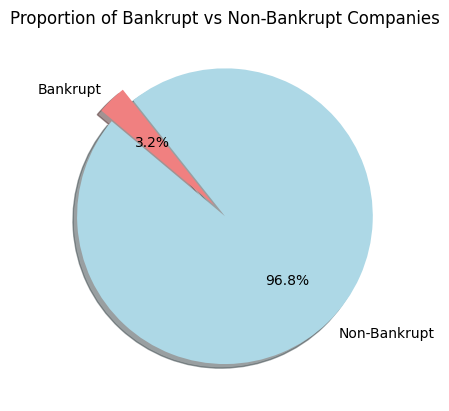

In [15]:
# Pie chart for visualization
labels = ['Non-Bankrupt', 'Bankrupt']
sizes = [bankruptcy_counts[0], bankruptcy_counts[1]]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)  # explode the 'Bankrupt' slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Bankrupt vs Non-Bankrupt Companies')
plt.show()

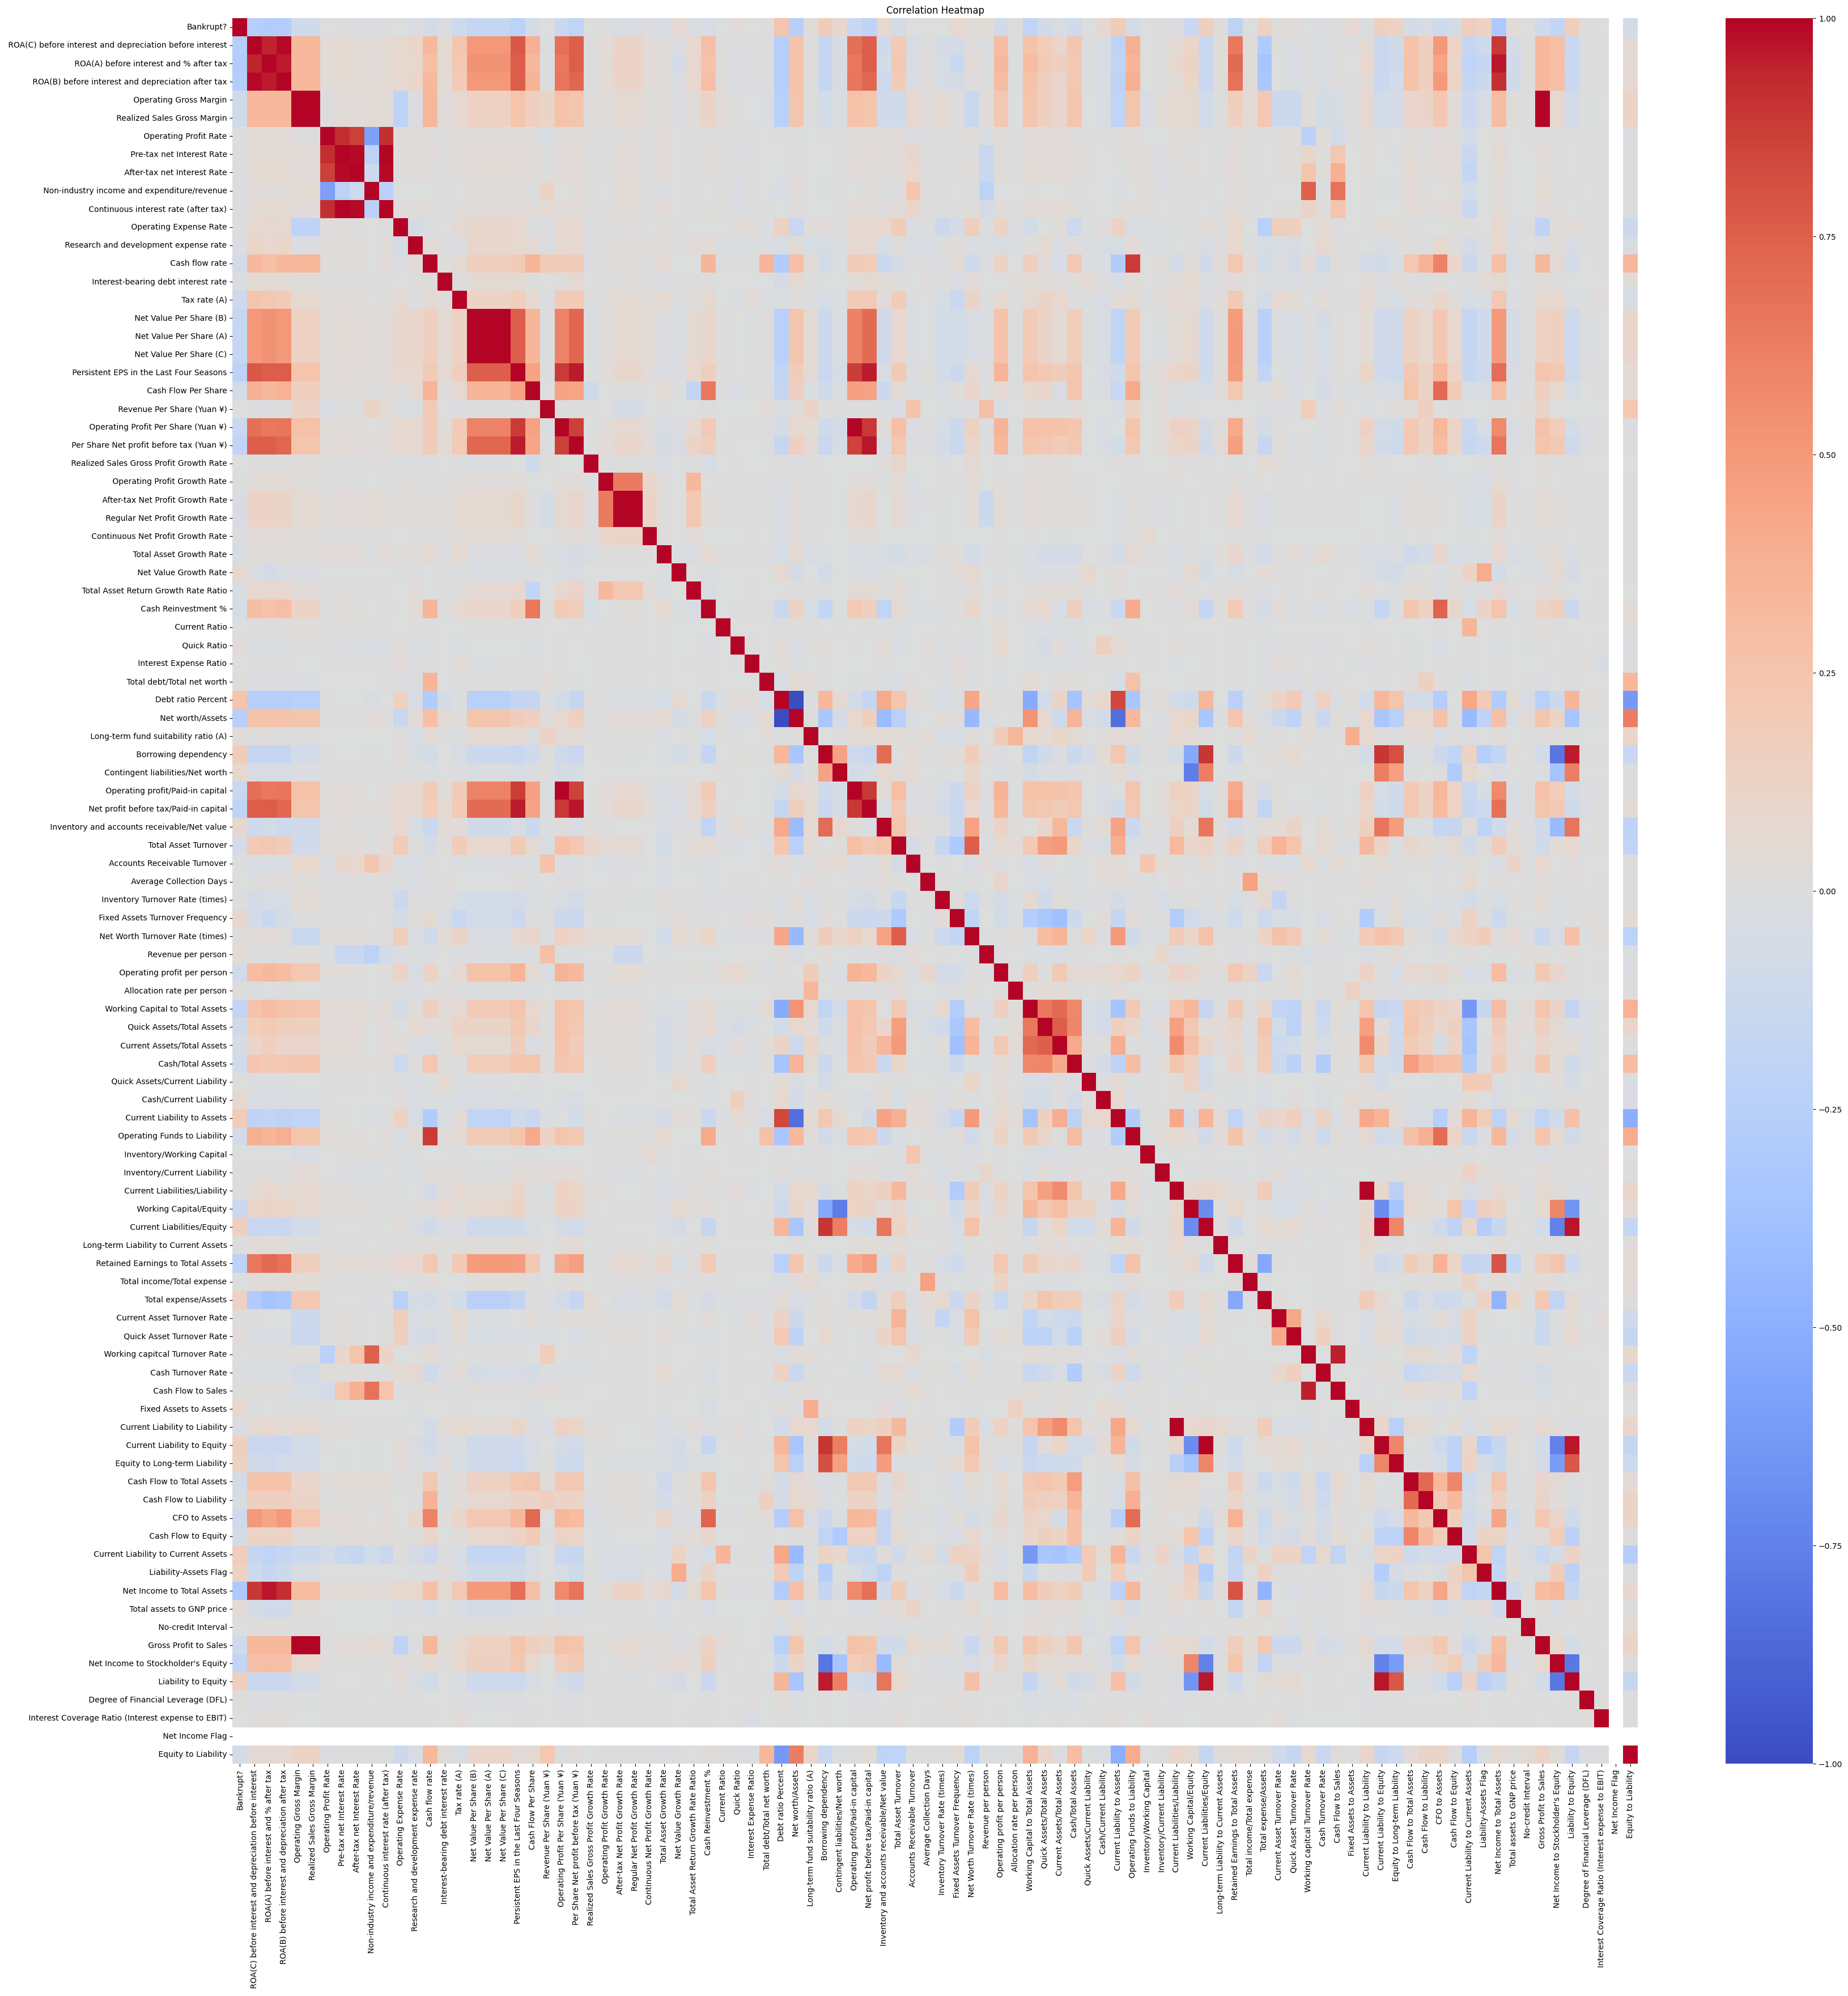

In [7]:
# Bivariate analysis with target variable
# Correlation matrix
plt.figure(figsize=(40, 40))
corr = CompanyData.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

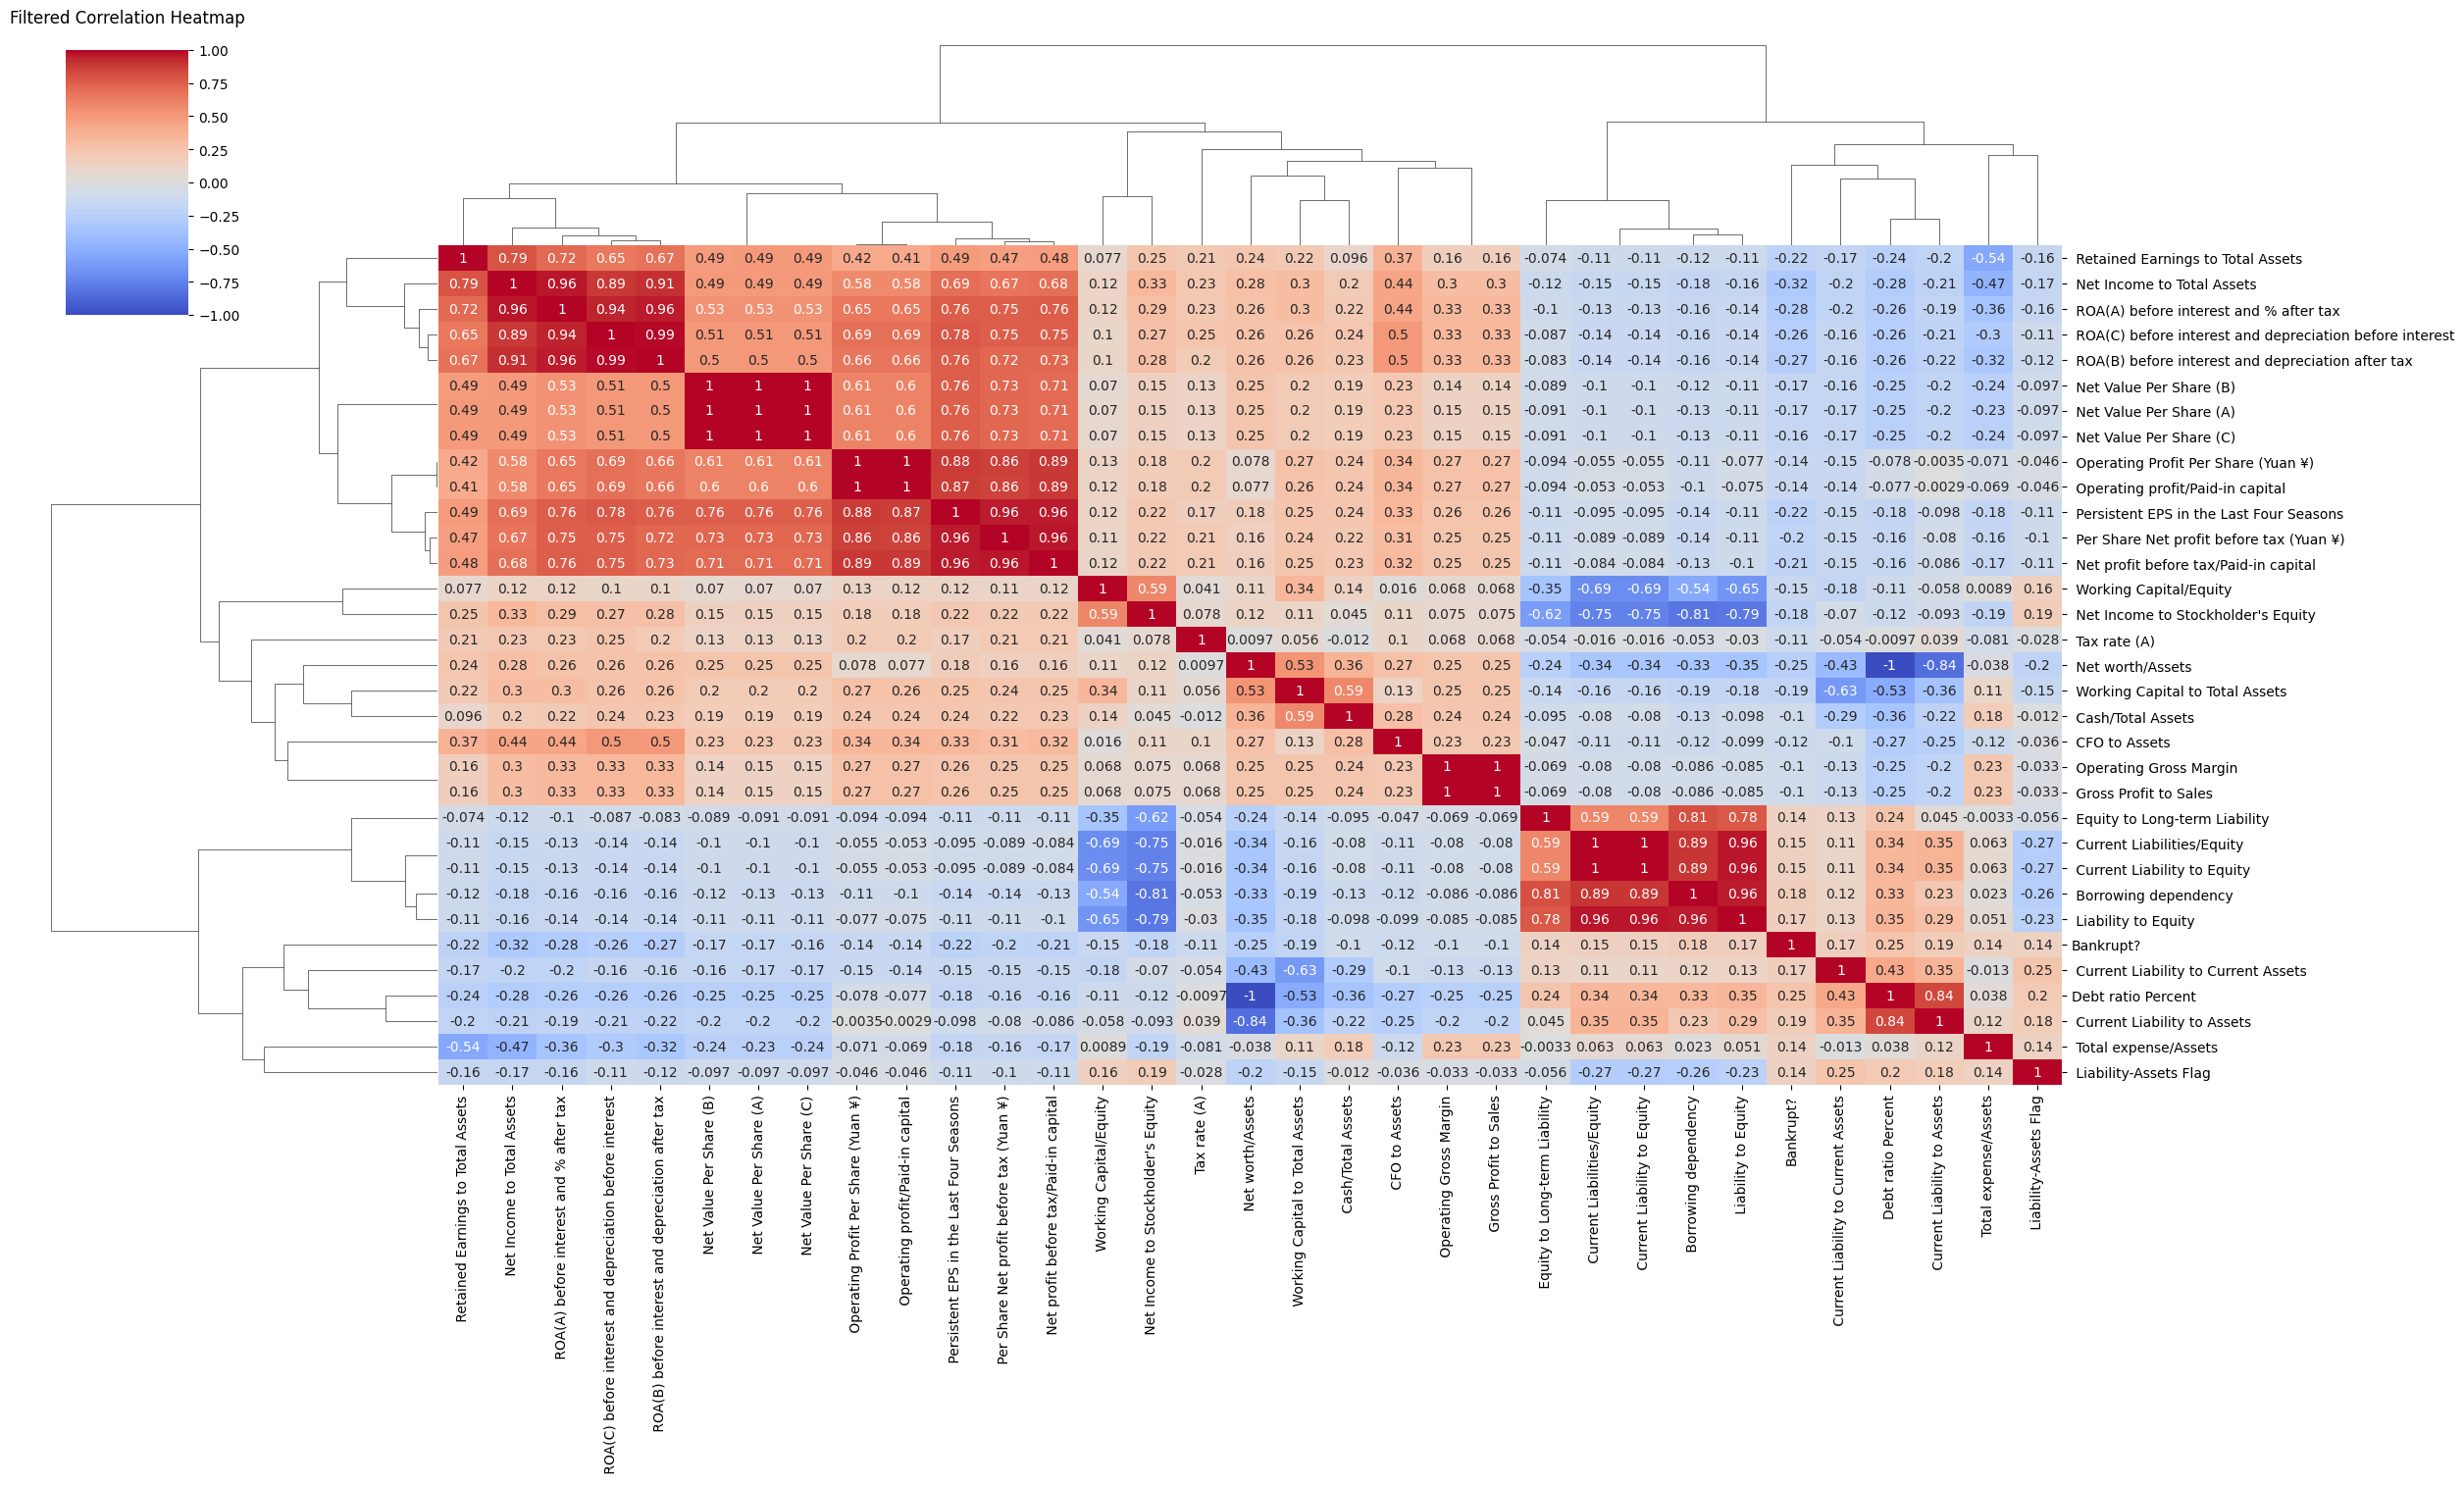

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = CompanyData.corr()

# Option 1: Limit variables based on correlation with the target variable
target_variable = 'Bankrupt?'
strong_corr_vars = corr[target_variable][(corr[target_variable] > 0.1) | (corr[target_variable] < -0.1)].index
filtered_corr = corr.loc[strong_corr_vars, strong_corr_vars]

# Option 2: Apply clustering for better grouping
sns.clustermap(filtered_corr, annot=True, cmap='coolwarm', figsize=(25, 15))

# Customize the heatmap
plt.title('Filtered Correlation Heatmap', pad=20)  # Title
plt.show()


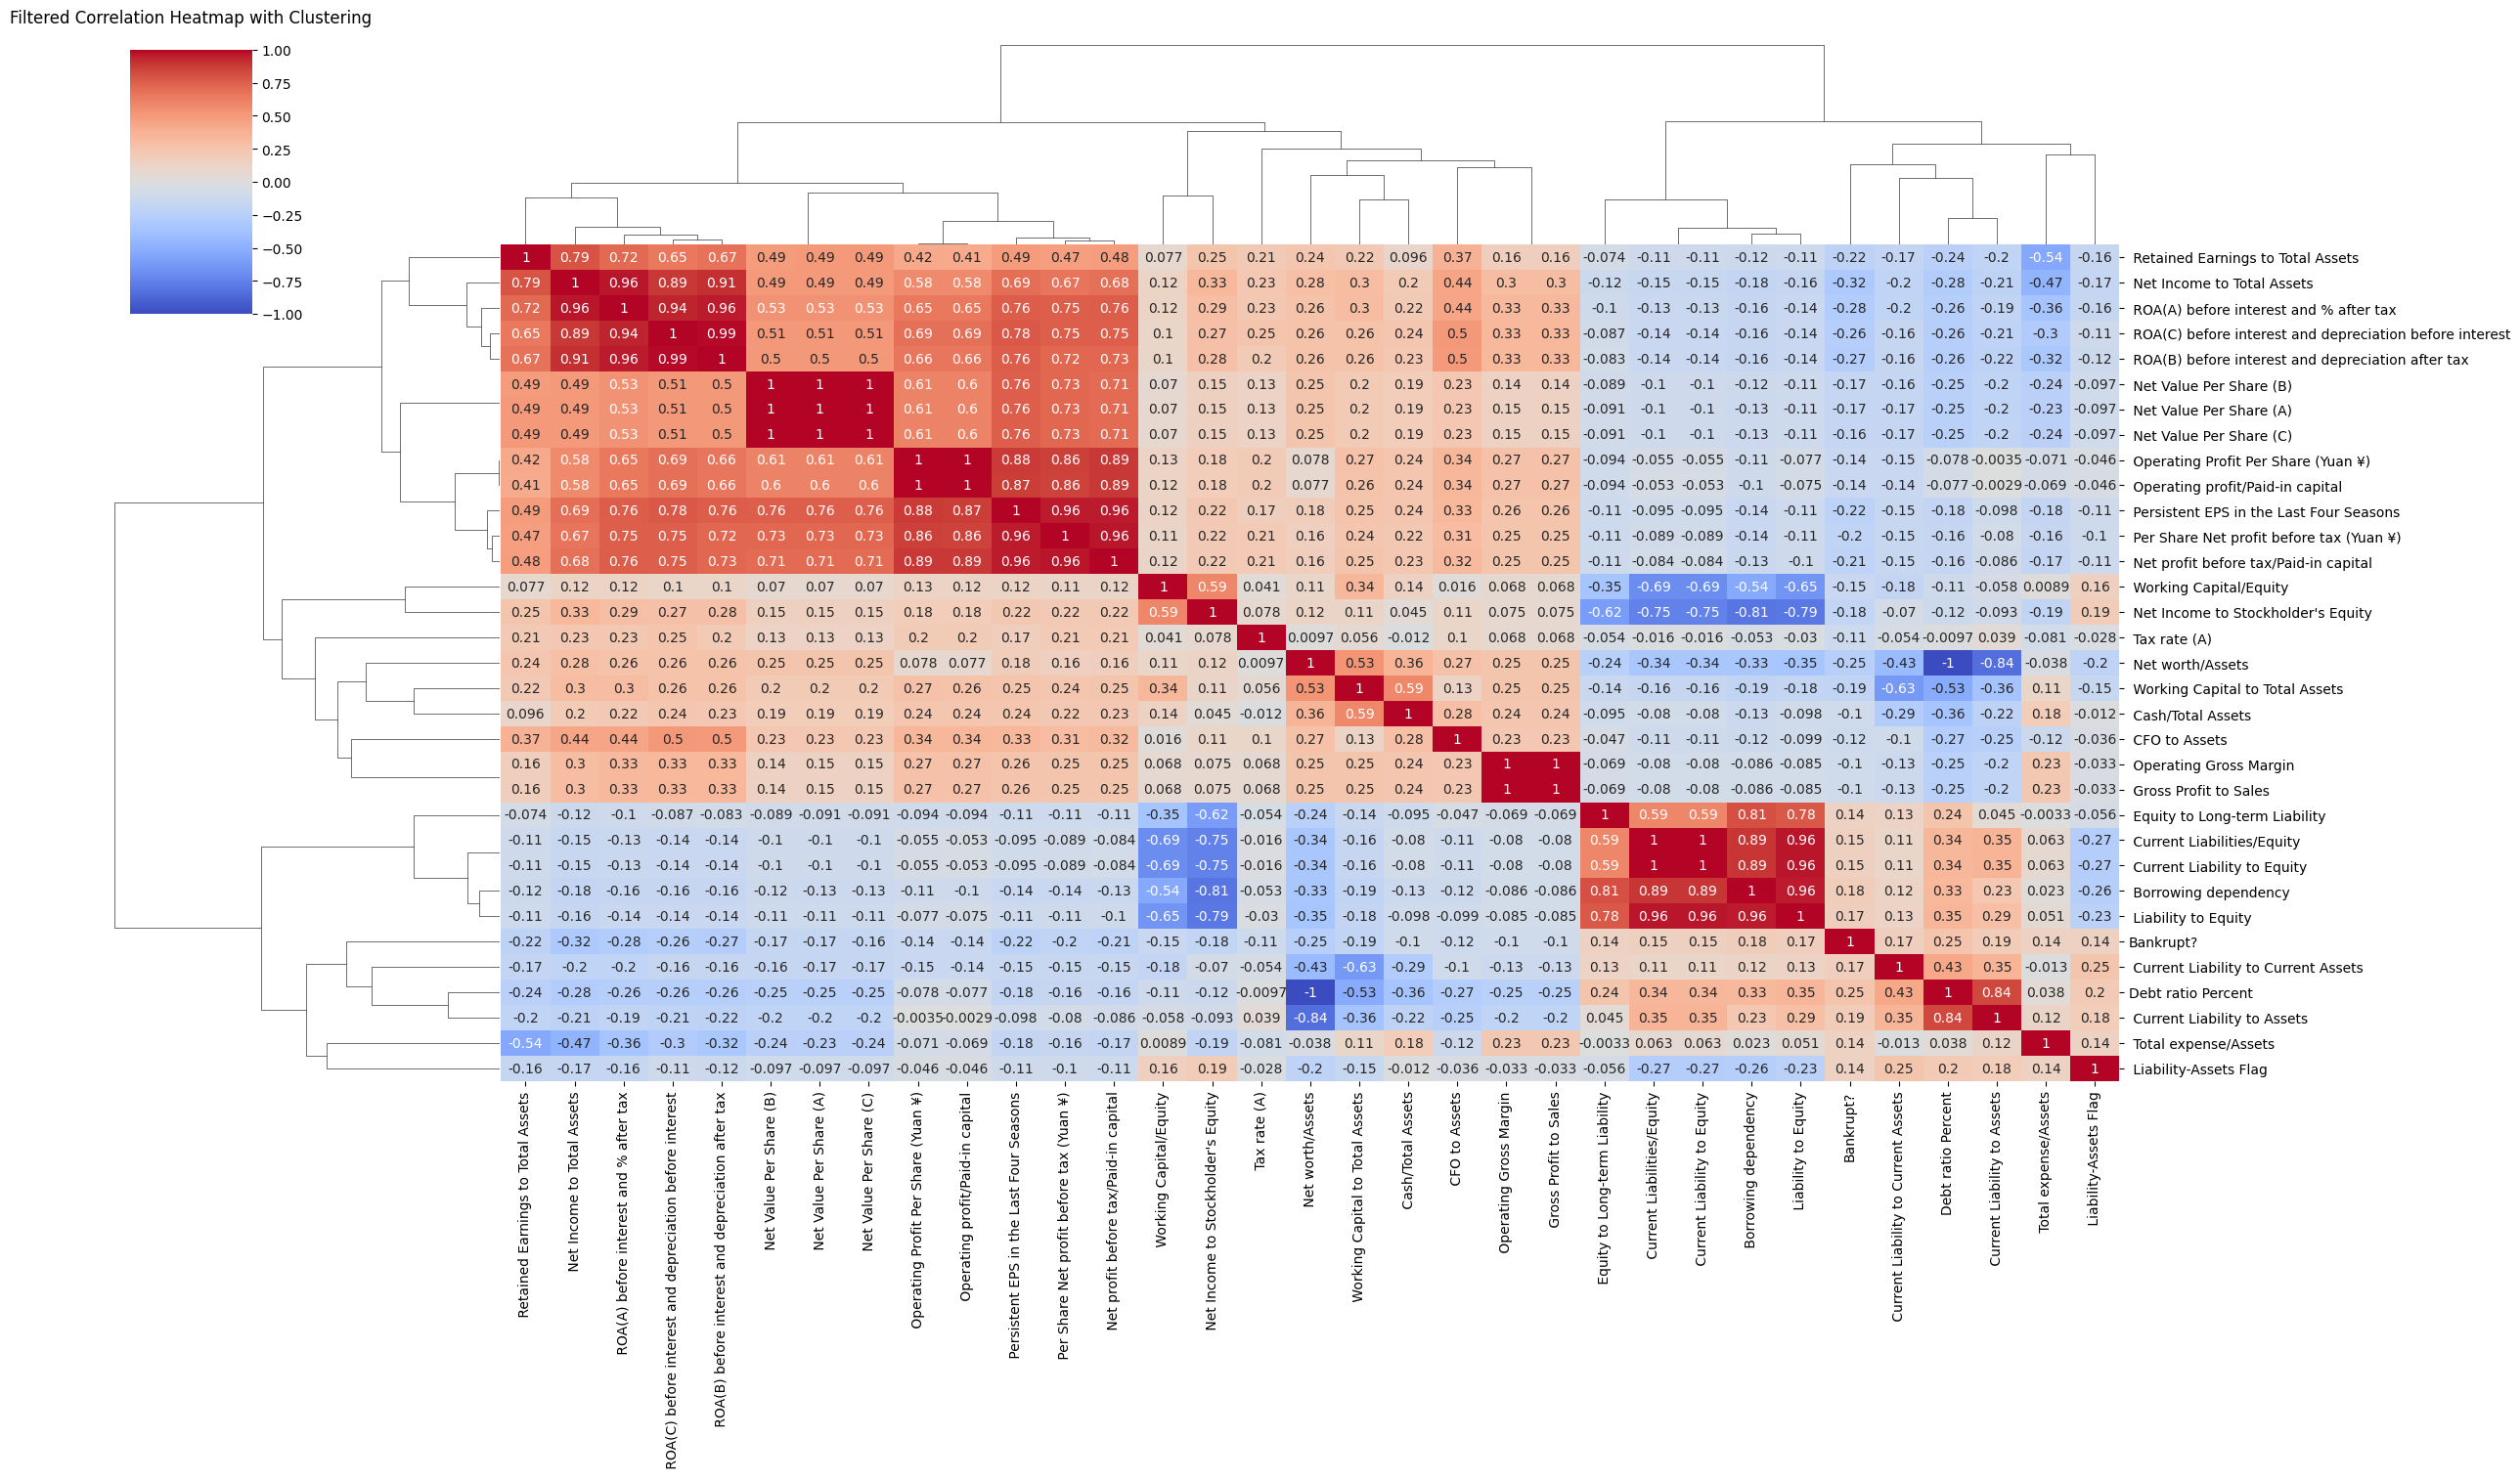

In [23]:


# Calculate the correlation matrix
corr = CompanyData.corr()

# Option 1: Filter variables based on correlation with the target variable
target_variable = 'Bankrupt?'

# Select variables with significant correlations (greater than 0.1 or less than -0.1)
strong_corr_vars = corr[target_variable][(corr[target_variable] > 0.1) | (corr[target_variable] < -0.1)].index
filtered_corr = corr.loc[strong_corr_vars, strong_corr_vars]

# Option 2: Use clustering to group related variables
# sns.clustermap applies hierarchical clustering to group strongly correlated variables
sns.clustermap(
    filtered_corr,          # Correlation matrix for strongly correlated variables
    annot=True,             # Show the correlation values on the heatmap
    cmap='coolwarm',        # Use a diverging color palette to highlight positive and negative correlations
    figsize=(25, 15),       # Adjust the size for readability
    method='average',       # Specify the clustering method (e.g., average linkage)
    metric='euclidean'      # Specify the distance metric (e.g., Euclidean distance)
)

# Add explanations for the grouping:
# - Clustering groups variables based on the similarity of their correlation patterns.
# - Variables in the same cluster are strongly related to each other.
# - For example, a cluster might group financial ratios like ROA, ROE, and profit margins together
#   because they have similar correlations with the target variable.

# Display the heatmap
plt.title('Filtered Correlation Heatmap with Clustering', pad=20)  # Add a title
plt.show()


In [8]:
# Correlation with target variable
target_corr = corr['Bankrupt?'].sort_values(ascending=False)
print("Features most correlated with target:\n", target_corr.head(21))


Features most correlated with target:
 Bankrupt?                                       1.000000
Debt ratio Percent                              0.250161
 Current Liability to Assets                    0.194494
 Borrowing dependency                           0.176543
 Current Liability to Current Assets            0.171306
 Liability to Equity                            0.166812
 Current Liabilities/Equity                     0.153828
 Current Liability to Equity                    0.153828
 Liability-Assets Flag                          0.139212
 Total expense/Assets                           0.139049
 Equity to Long-term Liability                  0.139014
 Cash/Current Liability                         0.077921
 Inventory and accounts receivable/Net value    0.075278
 Fixed Assets Turnover Frequency                0.072818
 Contingent liabilities/Net worth               0.070455
 Fixed Assets to Assets                         0.066328
 Net Value Growth Rate                          0

In [37]:
CompanyData.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

## Code explanation 
This code performs a two-sample t-test to determine if the mean values of the ROA(A) before interest and % after tax feature differ significantly between bankrupt and non-bankrupt companies. Let me explain each part of the code and the results.

**Interpretation:**

Bankrupt companies have a significantly lower ROA(A) before interest and % after tax compared to non-bankrupt companies.
This feature is likely a strong indicator of bankruptcy.
Actionable Insights:

Include ROA(A) in predictive models for bankruptcy detection.
Investigate further why this ratio differs so significantly between the groups.

In [26]:
import re

feature = [col for col in CompanyData.columns if re.search('ROA\(A\).*after tax', col)][0]
bankrupt = CompanyData[CompanyData['Bankrupt?'] == 1][feature]
non_bankrupt = CompanyData[CompanyData['Bankrupt?'] == 0][feature]
t_stat, p_value = ttest_ind(bankrupt, non_bankrupt, nan_policy='omit')
print(f"T-Test for {feature}: t-stat = {t_stat}, p-value = {p_value}")


T-Test for  ROA(A) before interest and % after tax: t-stat = -24.356285200551895, p-value = 1.0337410169791969e-125


In [25]:


# List of features to evaluate
features = [
    'Debt ratio Percent',
    ' Current Liability to Assets',
  #  ' Net Income to Total Assets'
    ' Borrowing dependency',
    ' Current Liability to Current Assets',
   # ' Net Income to Stockholder\'s Equity',
    ' Liability to Equity',
    ' Current Liabilities/Equity',
    ' Current Liability to Equity',
    ' Liability-Assets Flag',
    ' Total expense/Assets',
    ' Equity to Long-term Liability'
]

# Dictionary to store T-test results
t_test_results = {}

for feature in features:
    bankrupt = CompanyData[CompanyData['Bankrupt?'] == 1][feature]
    non_bankrupt = CompanyData[CompanyData['Bankrupt?'] == 0][feature]
    t_stat, p_value = ttest_ind(bankrupt, non_bankrupt, nan_policy='omit')
    t_test_results[feature] = (t_stat, p_value)

# Convert results to a DataFrame for easy sorting
t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index', columns=['t_stat', 'p_value'])

# Rank features by p-value
top_features = t_test_df.sort_values(by='p_value').head(20)
print("Top 10 features based on T-test:")
print(top_features)


Top 10 features based on T-test:
                                         t_stat       p_value
Debt ratio Percent                    21.332866  8.373953e-98
 Current Liability to Assets          16.371086  4.086586e-59
 Borrowing dependency                 14.808894  7.330779e-49
 Current Liability to Current Assets  14.356119  4.558388e-46
 Liability to Equity                  13.968580  9.676390e-44
 Current Liabilities/Equity           12.853850  2.218160e-37
 Current Liability to Equity          12.853850  2.218160e-37
 Liability-Assets Flag                11.607042  7.392576e-31
 Total expense/Assets                 11.593239  8.659356e-31
 Equity to Long-term Liability        11.590209  8.965114e-31


In [74]:


# Rank features by p-value
bottom_features = t_test_df.sort_values(by='p_value').tail(0)
print("Bottom 10 features based on T-test:")
print(top_features)

Bottom 10 features based on T-test:
                                         t_stat       p_value
Debt ratio Percent                    21.332866  8.373953e-98
 Current Liability to Assets          16.371086  4.086586e-59
 Borrowing dependency                 14.808894  7.330779e-49
 Current Liability to Current Assets  14.356119  4.558388e-46
 Liability to Equity                  13.968580  9.676390e-44
 Current Liabilities/Equity           12.853850  2.218160e-37
 Current Liability to Equity          12.853850  2.218160e-37
 Liability-Assets Flag                11.607042  7.392576e-31
 Total expense/Assets                 11.593239  8.659356e-31
 Equity to Long-term Liability        11.590209  8.965114e-31


# Key Observations:<br>
**T-Test Significance:**<br>

The t_stat values indicate the magnitude of the difference in the mean values of a feature between bankrupt and non-bankrupt companies.
The p_value reflects the statistical significance of the observed difference. Very small p-values (e.g., 2.098102 × 10−157) suggest that the feature strongly distinguishes the two groups.<br><br>

**Top Features:**<br>
1. Highly Predictive Features:<br>
Features like Net Income to Total Assets, ROA(A), ROA(B), and ROA(C) have the lowest p-values, indicating their high relevance.<br>
These features represent financial ratios that capture profitability and return on assets, critical in predicting bankruptcy.<br>
2. Debt and Liability Metrics:<br>
Features such as Debt ratio Percent, Current Liability to Assets, and Liability to Equity are also significant, highlighting the role of debt management in bankruptcy risk.<br>
3. Per Share Metrics:<br>
Metrics like Net Value Per Share reflect company performance at a granular level, showing importance in discriminating between the groups.

In [9]:
# Convert T-test results to DataFrame
top_features = pd.DataFrame({
    'Feature': [
        'Net Income to Total Assets', 'ROA_A', 'ROA_B', 'ROA_C', 'Net worth/Assets', 
        'Debt ratio Percent', 'Persistent EPS', 'Retained Earnings/Assets', 
        'Net profit before tax/Capital', 'Per Share Net Profit', 
        'Current Liability to Assets', 'Working Capital to Assets',
        'Net Income/Stockholder Equity', 'Borrowing dependency', 
        'Current Liability/Current Assets', 'Liability to Equity', 
        'Net Value Per Share_A', 'Net Value Per Share_B', 
        'Net Value Per Share_C', 'Current Liability to Equity'
    ],
    't_stat': [-27.45, -24.36, -23.43, -22.31, -21.33, 21.33, -18.58, -18.42, 
               -17.54, -16.97, 16.37, -16.25, -15.19, 14.81, 14.36, 13.97, 
               -13.85, -13.85, -13.79, 12.85],
    'p_value': [
        2.098e-157, 1.033e-125, 7.094e-117, 1.950e-106, 8.374e-98, 8.374e-98,
        3.201e-75, 5.244e-74, 1.942e-67, 2.441e-63, 4.087e-59, 2.855e-58,
        2.659e-51, 7.331e-49, 4.558e-46, 9.676e-44, 4.685e-43, 5.058e-43,
        1.034e-42, 2.218e-37
    ]
})

In [ ]:
top_features["Feature"].unique() # Top 20 features from the 95 

array(['Net Income to Total Assets', ' ROA(A)', 'ROA(B)', 'ROA(C)',
       'Net worth/Assets', 'Debt ratio Percent', 'Persistent EPS',
       'Retained Earnings/Assets', 'Net profit before tax/Capital',
       'Per Share Net Profit', 'Current Liability to Assets',
       'Working Capital to Assets', 'Net Income/Stockholder Equity',
       'Borrowing dependency', 'Current Liability/Current Assets',
       'Liability to Equity', 'Net Value Per Share (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (C)',
       'Current Liability to Equity'], dtype=object)

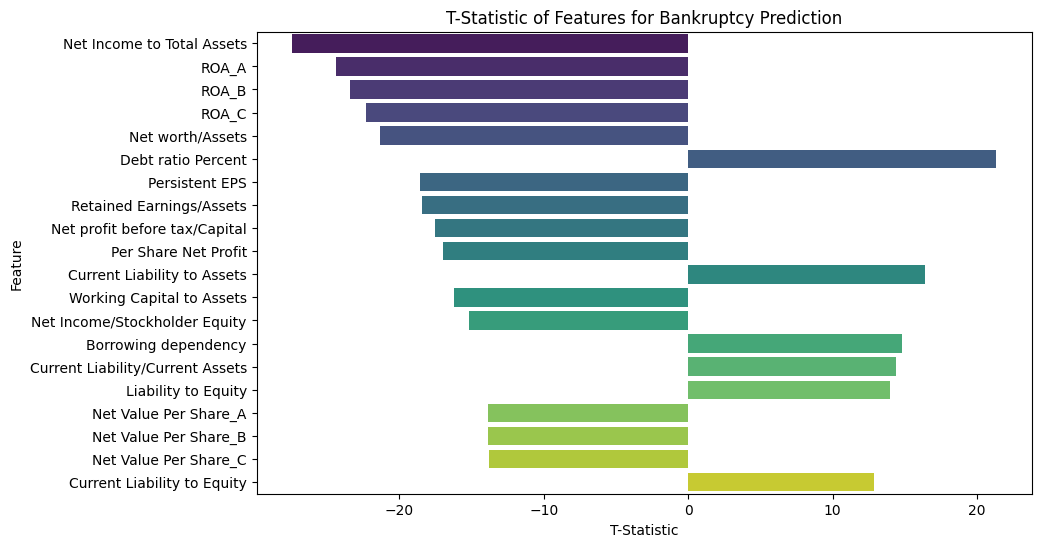

In [10]:
# Bar chart for t-statistic to visualize relationship of each feature to predicting bankrupcy.
# The bar chart show the magnitude of t_stat values for the top features, illustrating which features have the greatest discriminatory power.
# The negative features shows that companies that have low t-values of it e.g. ROA_A have the higher chance of bankrupcy and high t-values of the features like Debt raio percent also predicts Bankrupcy
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, y='Feature', x='t_stat', palette='viridis')
plt.title('T-Statistic of Features for Bankruptcy Prediction')
plt.xlabel('T-Statistic')
plt.ylabel('Feature')
plt.show()



To use the p-values and related insights for estimating or forecasting target benchmarks that a company should aim for to avoid bankruptcy, we can:

Approach
Threshold Analysis:

Identify critical thresholds for the most significant features (those with the smallest p-values).
These thresholds can act as benchmarks for companies to maintain profitability, manage debt, and improve financial health.
Feature Groups and Their Relevance:

Profitability Metrics: Features like Net Income to Total Assets, ROA(A), etc., indicate the need to achieve a certain return on assets and net income ratios to stay solvent.
Debt Metrics: Features like Debt Ratio Percent and Liability to Equity suggest managing debt and equity ratios to avoid financial distress.
Per Share Metrics: Features such as Net Value Per Share highlight the importance of maintaining shareholder value.
Forecasting with Statistical Benchmarks:

Use statistical measures (mean, median, standard deviation) for these features to define safe ranges for the benchmarks.
Calculate confidence intervals to estimate a range within which companies are likely to avoid bankruptcy.
Implementation:

Develop a model that flags companies at risk when they deviate significantly from these benchmarks.
Utilize thresholds and ranges derived from historical data to monitor financial health.

In [13]:
# Make a copy of the CompanyData dataset
CompanyData_copy = CompanyData.copy()

# List of top features based on T-Test
top_features = [
      ' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', 
        'Debt ratio Percent', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', 
        ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)', 
        ' Current Liability to Assets', ' Working Capital to Total Assets',
        ' Net Income to Stockholder\'s Equity', ' Borrowing dependency', 
        ' Current Liability to Current Assets', ' Current Liability to Equity', 
        ' Net Value Per Share (A)', ' Net Value Per Share (B)', 
        ' Net Value Per Share (C)', ' Current Liabilities/Equity'
]

# Calculate mean and standard deviation for bankrupt and non-bankrupt groups
benchmark_stats = {}

for feature in top_features:
    bankrupt = CompanyData_copy[CompanyData_copy['Bankrupt?'] == 1][feature]
    non_bankrupt = CompanyData_copy[CompanyData_copy['Bankrupt?'] == 0][feature]
    
    benchmark_stats[feature] = {
        'Bankrupt_mean': bankrupt.mean(),
        'Non_Bankrupt_mean': non_bankrupt.mean(),
        'Non_Bankrupt_std': non_bankrupt.std(),
        'Threshold_min': non_bankrupt.mean() - 1.96 * non_bankrupt.std(),
        'Threshold_max': non_bankrupt.mean() + 1.96 * non_bankrupt.std()
    }

# Convert to DataFrame for display
benchmark_df = pd.DataFrame(benchmark_stats).T
print("Benchmark Statistics:")
print(benchmark_df)

Benchmark Statistics:
                                                          Bankrupt_mean  \
 Net Income to Total Assets                                    0.738083   
 ROA(A) before interest and % after tax                        0.456947   
 ROA(B) before interest and depreciation after tax             0.461483   
 ROA(C) before interest and depreciation before interest       0.418503   
 Net worth/Assets                                              0.812953   
Debt ratio Percent                                             0.187047   
 Persistent EPS in the Last Four Seasons                       0.188818   
 Retained Earnings to Total Assets                             0.904244   
 Net profit before tax/Paid-in capital                         0.147672   
 Per Share Net profit before tax (Yuan ¥)                      0.147765   
 Current Liability to Assets                                   0.144238   
 Working Capital to Total Assets                               0.751681   
 Ne

Why Use This Approach?
P-Values Provide Significance:

By focusing on features with the smallest p-values, we ensure that the benchmarks are based on statistically significant indicators of bankruptcy.
Thresholds Provide Actionable Metrics:

Safe ranges allow companies to monitor and manage critical financial ratios.
Forecasting with Confidence:

Using confidence intervals ensures the benchmarks are robust and account for variability in the data.
Actionable Insights for Businesses:

The business can monitor these benchmarks regularly to detect early signs of financial distress and take corrective action.
This approach combines statistical rigor with practical application, helping the business proactively manage their financial health.

In [14]:
CompanyData_copy.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

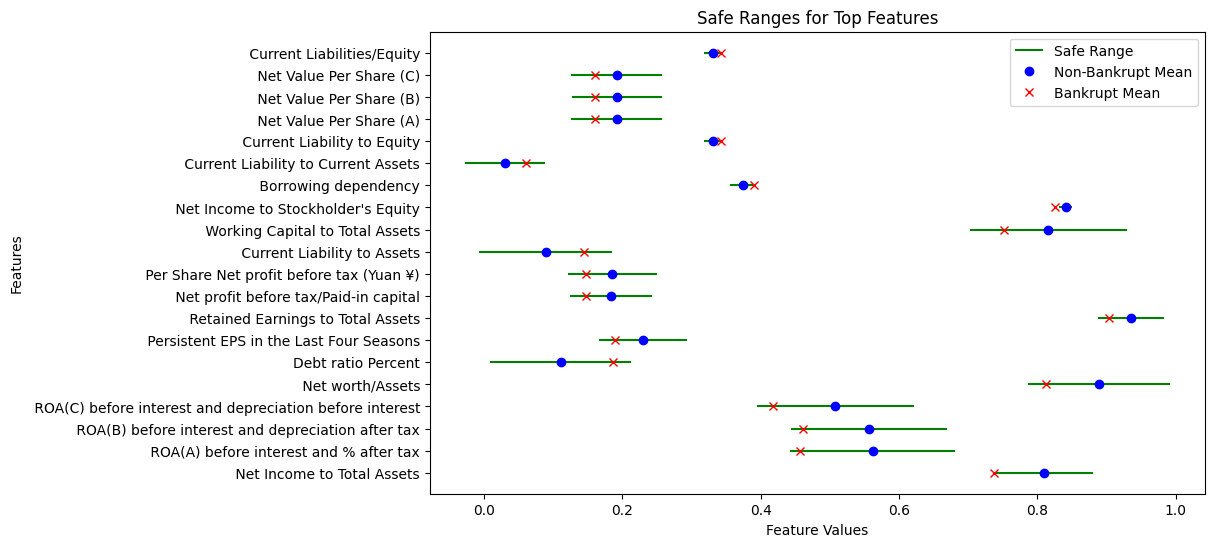

In [15]:
# Visualize thresholds
plt.figure(figsize=(10, 6))

for feature in top_features:
    plt.hlines(
        y=feature, 
        xmin=benchmark_stats[feature]['Threshold_min'], 
        xmax=benchmark_stats[feature]['Threshold_max'], 
        color='green', label='Safe Range' if feature == top_features[0] else ""
    )
    plt.plot(
        benchmark_stats[feature]['Non_Bankrupt_mean'], feature, 'o', color='blue', label='Non-Bankrupt Mean' if feature == top_features[0] else ""
    )
    plt.plot(
        benchmark_stats[feature]['Bankrupt_mean'], feature, 'x', color='red', label='Bankrupt Mean' if feature == top_features[0] else ""
    )

plt.title("Safe Ranges for Top Features")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.legend()
plt.show()

This help the company to identify the number of companies at the risk of banrupcy from the total list of 6819 companies based on the 20 features identified as mostly correlated to the target variable

In [16]:
# Function to flag companies at risk of bankrupcy based on thresholds
def flag_risk(row, benchmarks):
    risk_flags = {}
    for feature, stats in benchmarks.items():
        if row[feature] < stats['Threshold_min'] or row[feature] > stats['Threshold_max']:
            risk_flags[feature] = True
        else:
            risk_flags[feature] = False
    return risk_flags

# Apply to dataset
CompanyData_copy['Risk_Flags'] = CompanyData_copy.apply(lambda row: flag_risk(row, benchmark_stats), axis=1)
CompanyData_copy['High_Risk'] = CompanyData_copy['Risk_Flags'].apply(lambda x: any(x.values()))

# Count high-risk companies
print("Number of High-Risk Companies:", CompanyData_copy['High_Risk'].sum())


Number of High-Risk Companies: 1487


# Normalization  for Pre Model Building 

Preprocess and Remove Noise
Objective: Ensure clean and reliable data for modeling.
Steps:
Load and examine the dataset for missing values, duplicates, and outliers.
Handle missing values using appropriate techniques (mean/median imputation, dropping, or interpolation).
Normalize or standardize numerical data to maintain consistency.
Encode categorical variables with one-hot or label encoding.
Remove irrelevant or redundant attributes based on correlation analysis.

In [17]:
# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = CompanyData.select_dtypes(include=['float64', 'int64']).columns
data_scaled = pd.DataFrame(scaler.fit_transform(CompanyData[numerical_cols]), columns=numerical_cols)

In [18]:
# Processed data
Companydata_processed = data_scaled

# Feature Selection

In [19]:
# Select relevant features
features = [
    ' Net Income to Total Assets', ' ROA(A) before interest and % after tax', 
    ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', 
    ' Net worth/Assets', 'Debt ratio Percent', ' Persistent EPS in the Last Four Seasons', 
    ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', 
    ' Per Share Net profit before tax (Yuan ¥)'
]

# Define the target variable
target_variable = 'Bankrupt?'

# Select features and target from the dataset
X = Companydata_processed[features]
y = Companydata_processed[target_variable]


In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression model (optional, if needed)
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))

RMSE: 0.9807093622982634


This divides the data into 3 clusters for segmenting the compaies <br>

The KMeans clustering algorithm has grouped the data into 3 clusters, and the cluster centers represent the average values for each feature in each cluster.  <br>

**Cluster Centers:** <br>
1. Cluster 0 (Positive values): <br>
The values in this cluster are relatively high for many of the features (e.g., ROA(A), Net Income to Total Assets), indicating that the companies in this cluster have higher financial ratios and profitability measures. <br>
The cluster center has positive values across almost all features, suggesting these companies are more financially healthy and likely have higher profitability, low debt, and better overall financial metrics. <br>

2. Cluster 1 (Near-zero values): <br>
This cluster's center is close to zero for most features. This suggests that the companies in this cluster have values near the average of the entire dataset. <br>
These companies are likely to have average financial health, neither overly strong nor weak, with moderate profitability and debt ratios. Essentially, these companies do not stand out significantly in terms of financial performance.<br>

3. Cluster 2 (Negative values):<br>
This cluster has negative values for most of the features, indicating that the companies in this group are financially weaker. For example, features like Net Income to Total Assets, ROA(A), ROA(B) show significantly negative values, suggesting these companies may be facing <br>
profitability and asset management issues. High debt and low profitability are likely characteristics of this cluster, which may be associated with companies that are at a higher risk of bankruptcy or financial distress. <br><br>

>What This Means:<br>
Cluster 0: Likely represents companies with strong financials, such as profitable companies with good asset management and low debt.<br>
Cluster 1: Represents companies with average financials, which could be neither particularly profitable nor struggling. <br>
Cluster 2: Represents struggling companies, with poor profitability, high liabilities, and financial instability.<br>

>How to Use This Information:<br>
If the business want to predict or analyze bankruptcy risk, it may want to focus on Cluster 2, as it likely represents companies at risk of financial distress or bankruptcy.<br>
Cluster 0 may represent financially stable companies, while Cluster 1 could indicate companies that may need closer scrutiny to predict long-term financial health.<br>
These cluster centers give the company a summary of the "average" company in each group, which can be used to guide decision-making, such as identifying target groups for financial health improvement or bankruptcy prediction modeling.

In [21]:
# Clustering (optional, if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[ 1.07245492  1.23709279  1.26410173  1.31776593  0.4664909  -0.4664909
   1.26959885  0.73161908  1.252694    1.24311926]
 [ 0.02562237 -0.02286819 -0.04544109 -0.07109685 -0.01762437  0.01762437
  -0.13094493  0.06844275 -0.13458445 -0.13383545]
 [-1.65355958 -1.64235421 -1.56660855 -1.51315471 -0.57380068  0.57380068
  -1.14211956 -1.38571037 -1.09969573 -1.08987642]]


**Cluster interpretation**


This shows how many data points belong to each cluster.
Non-technical audiences often find bar charts easy to interpret.

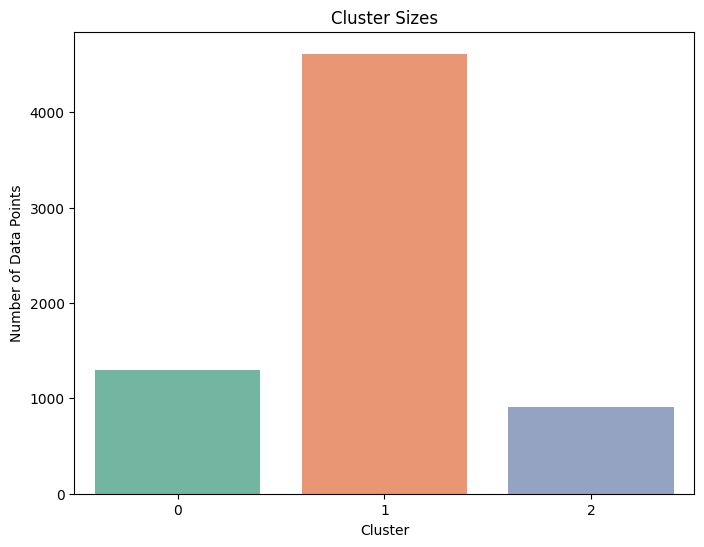

In [22]:


# Count the number of points in each cluster
cluster_counts = np.bincount(clusters)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(cluster_counts)), y=cluster_counts, palette="Set2")
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.show()


**Cluster Centroids as Profiles**<br>
Show the cluster centers as feature profiles using a heatmap.
This gives an idea of the characteristics of each cluster.

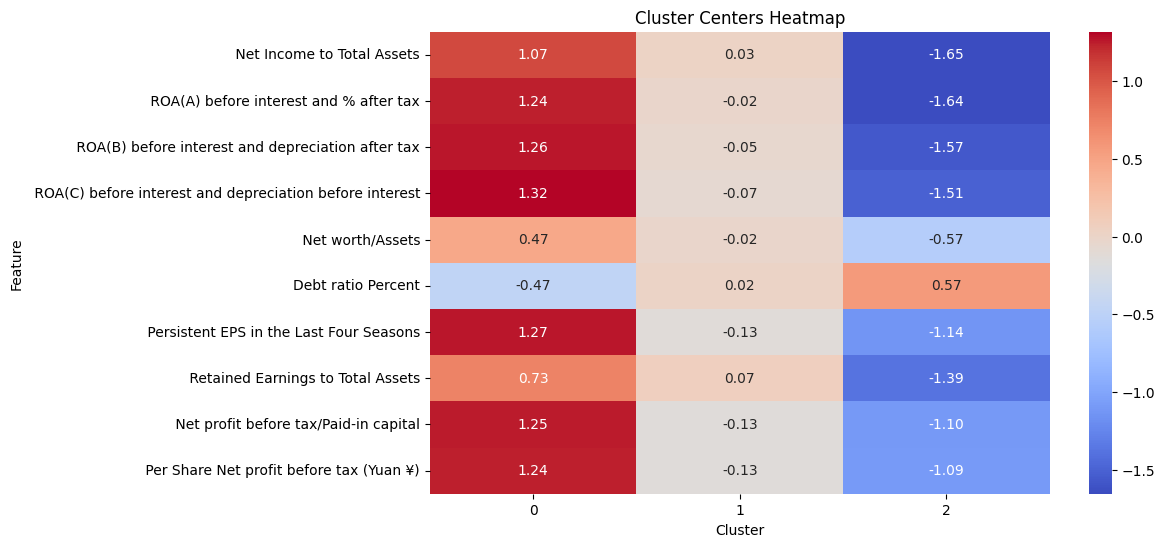

In [23]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Centers Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

**Radar Chart (Spider Plot)**<br>
Visualize the relative strengths of features for each cluster.

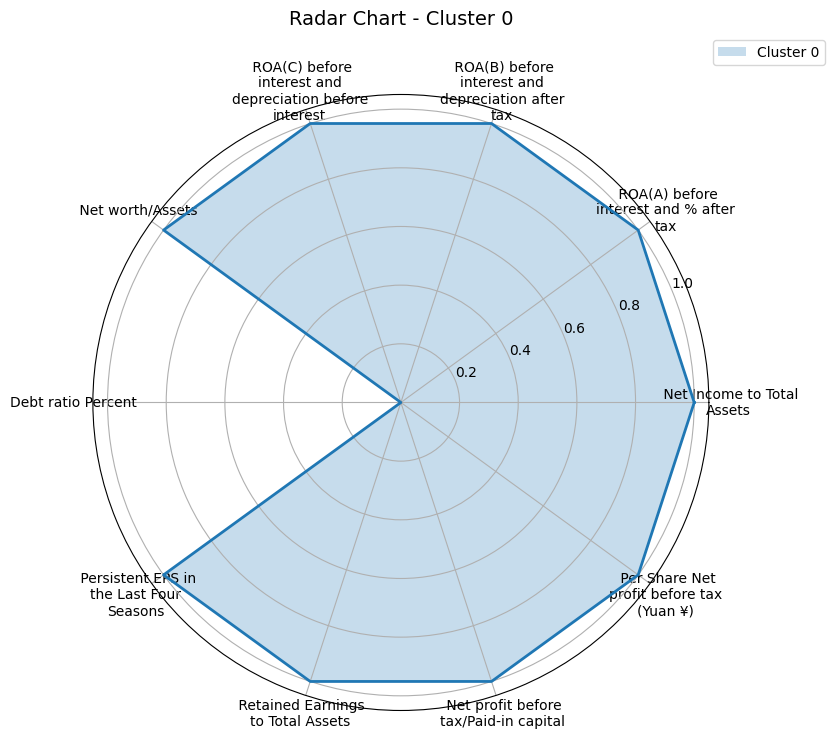

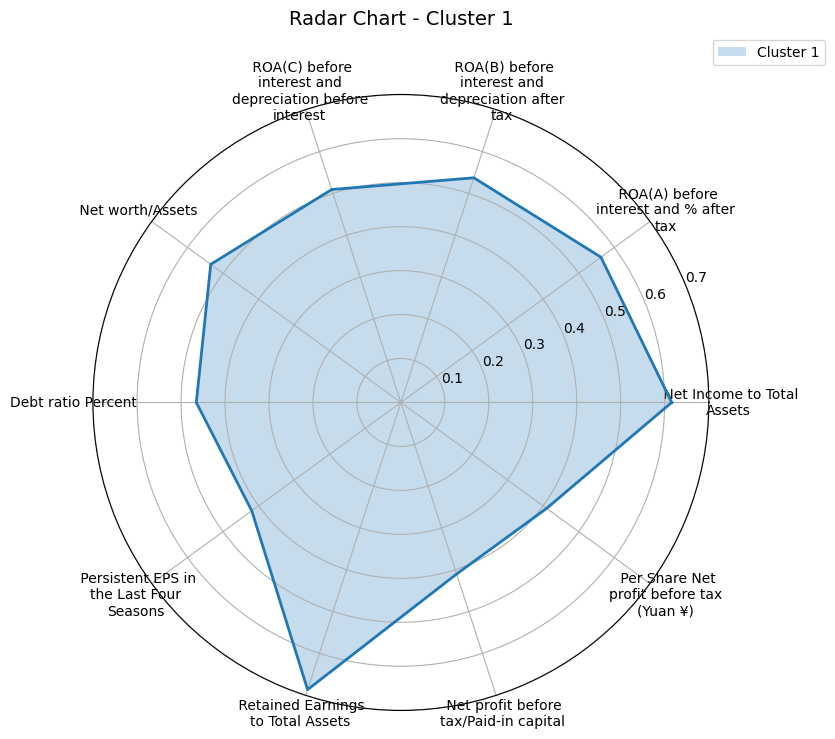

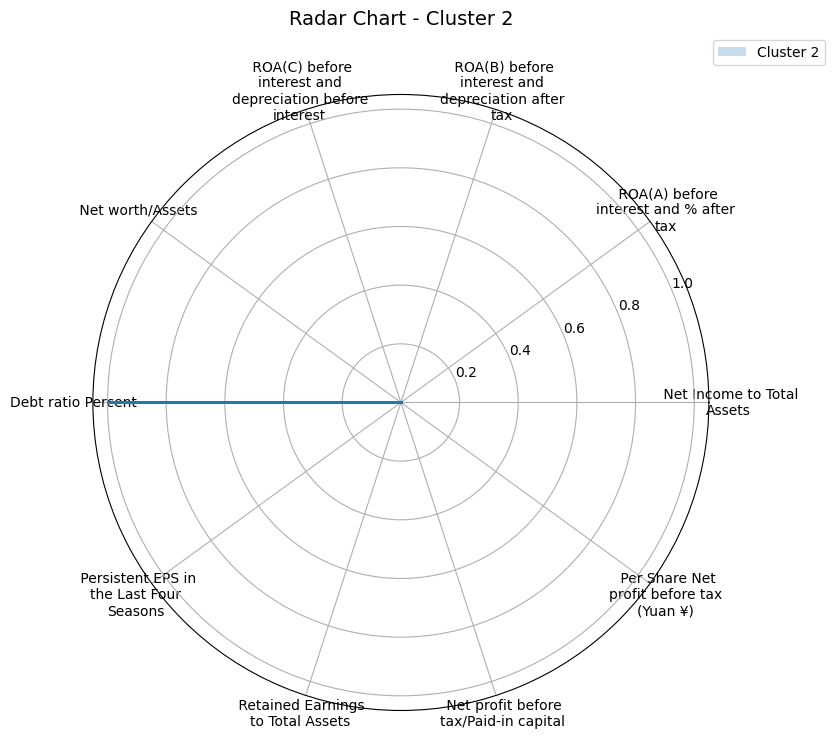

In [27]:
from math import pi
import textwrap

# Normalize cluster centers for radar chart
cluster_centers = kmeans.cluster_centers_
normalized_centers = (cluster_centers - cluster_centers.min(axis=0)) / (cluster_centers.max(axis=0) - cluster_centers.min(axis=0))

# Create radar chart
categories = X.columns
num_vars = len(categories)

# Function to wrap long labels. wrap the text labels into multiple lines. Unfortunately, matplotlib doesn’t natively support automatic text wrapping for axis labels, 
# but we can achieve this by using the textwrap library to insert line breaks into long labels.
def wrap_labels(labels, max_width=20):
    return ['\n'.join(textwrap.wrap(label, max_width)) for label in labels]

wrapped_categories = wrap_labels(categories)  # Wrap long labels

for i in range(kmeans.n_clusters):
    values = normalized_centers[i].tolist()
    values += values[:1]  # Repeat the first value to close the circle

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))  # Increased figure size
    ax = plt.subplot(111, polar=True)
    
    # Plot data
    ax.fill(angles, values, alpha=0.25, label=f"Cluster {i}")
    ax.plot(angles, values, linewidth=2)
    
    # Set wrapped labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(wrapped_categories, fontsize=10, ha='center')  # Centered for better alignment
    
    # Adjust title position
    plt.title(f"Radar Chart - Cluster {i}", y=1.1, fontsize=14)
    
    # Add legend
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))  # Position legend outside chart
    
    plt.show()


**Boxplots for Feature Distribution Across Clusters**
This shows the distribution of each feature for different clusters.

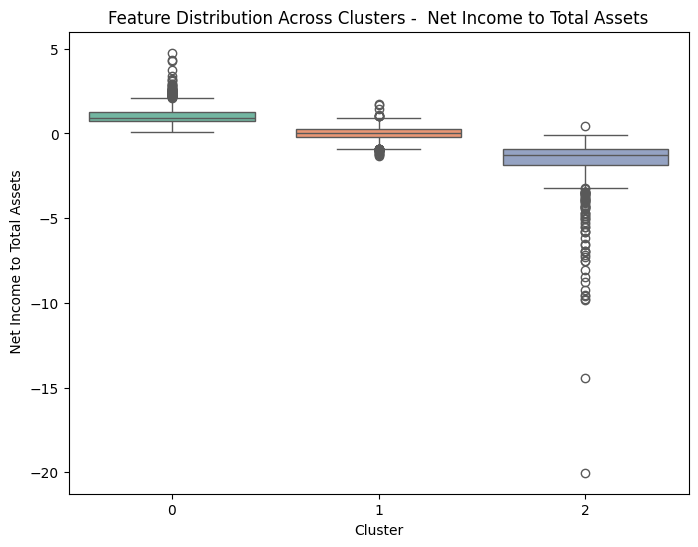

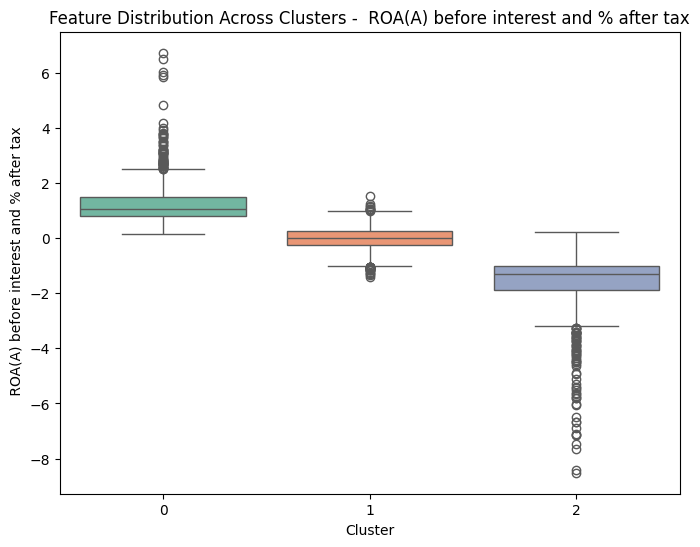

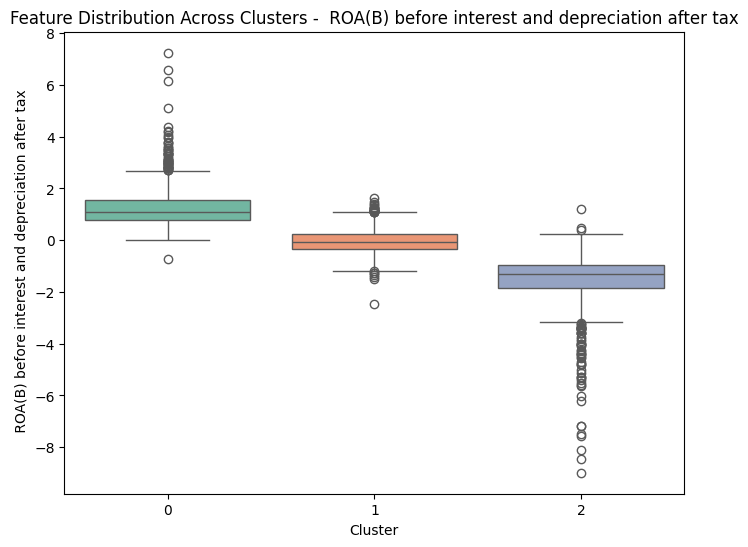

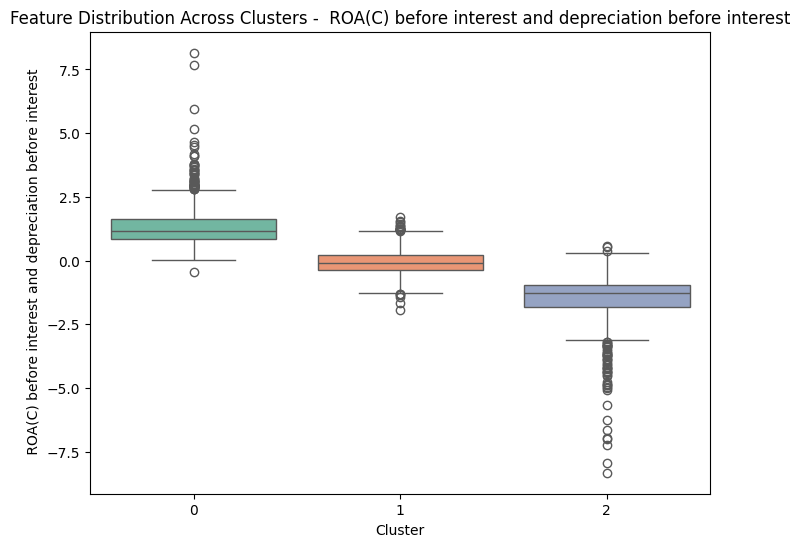

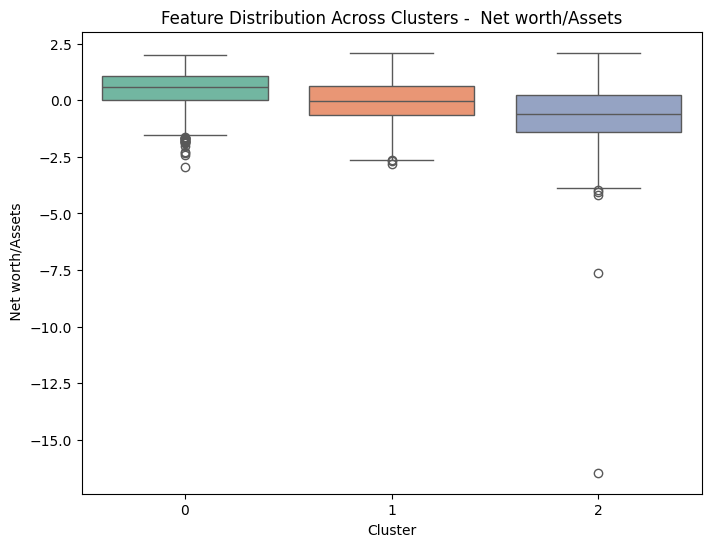

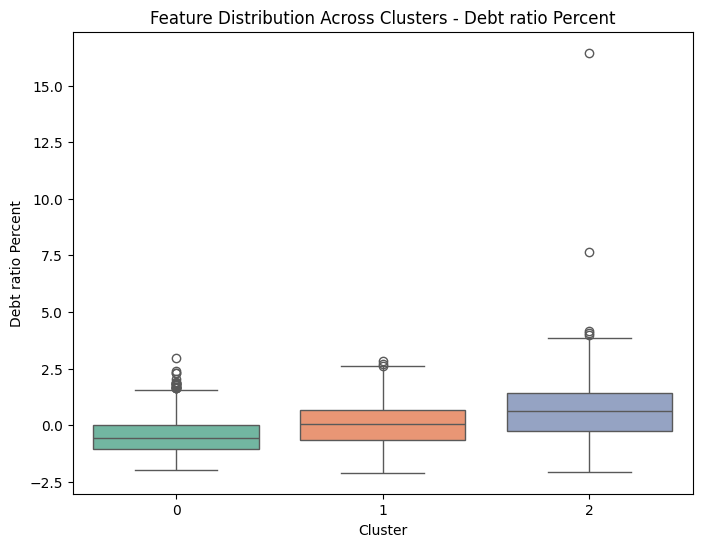

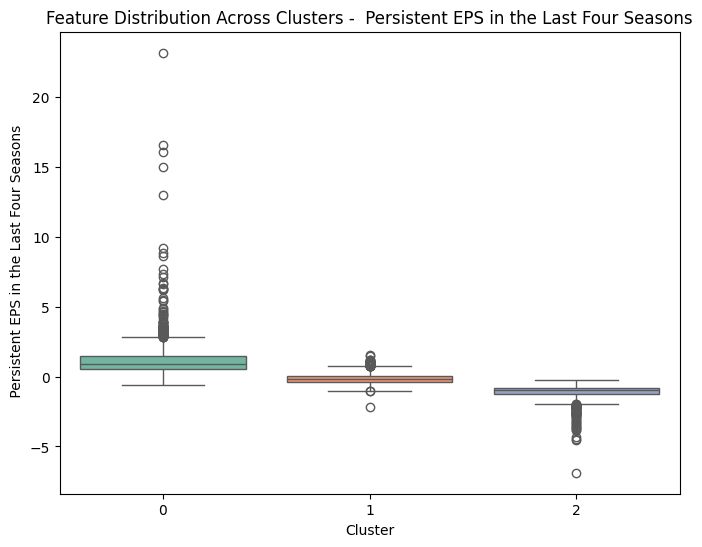

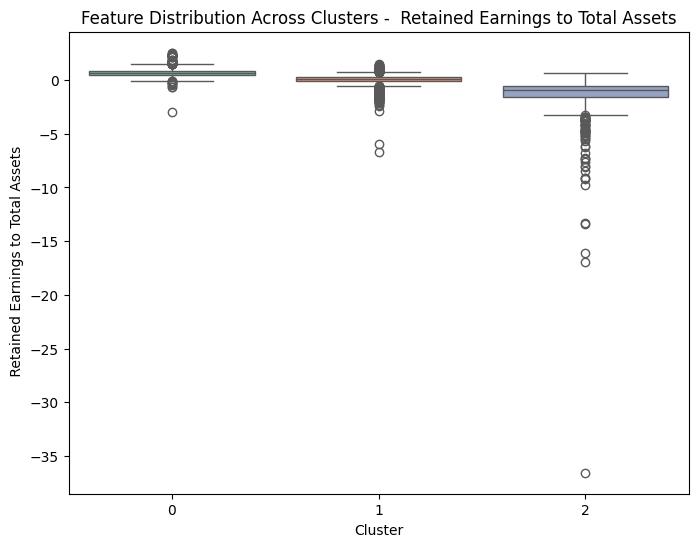

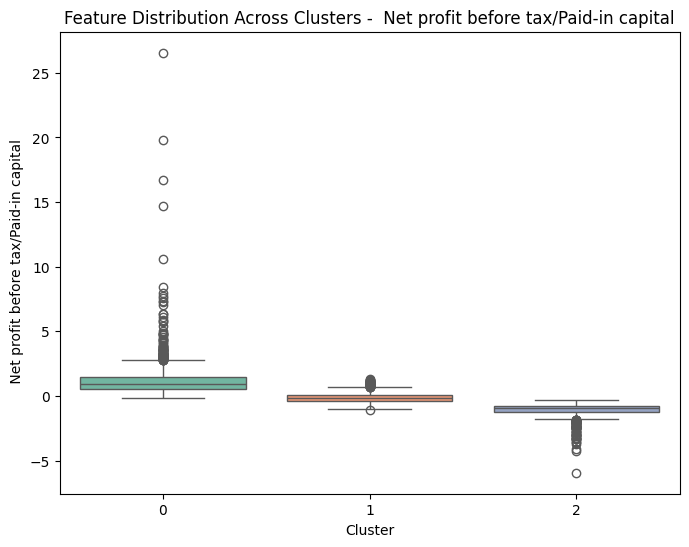

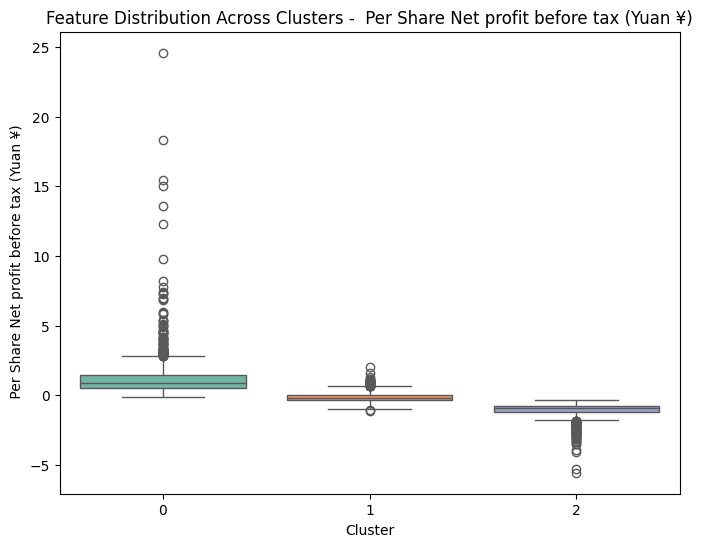

In [28]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=clusters, y=X[column], palette="Set2")
    plt.title(f"Feature Distribution Across Clusters - {column}")
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.show()


**Pie Chart for Cluster Proportions**<br>
Display the proportion of data points in each cluster.

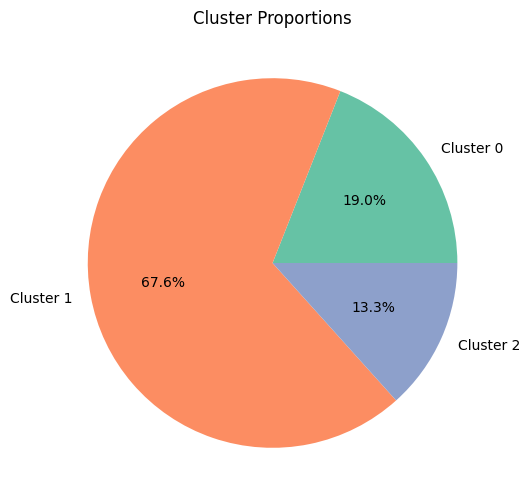

In [29]:
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=[f"Cluster {i}" for i in range(len(cluster_counts))], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Cluster Proportions")
plt.show()


In [ ]:
clusters # an array of the clusters

array([2, 1, 2, ..., 1, 1, 1])

In [30]:
# Add the cluster labels to your CompanyData_processed dataframe
Companydata_processed['Cluster'] = clusters  # Add cluster assignments to the dataframe

In [128]:
Companydata_processed

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0      5.476811                                          -2.217909          
1      5.476811                                          -0.673828          
2      5.476811                                          -1.303672          
3      5.476811                                          -1.735886          
4      5.476811                                          -0.661778          
...         ...                                                ...          
6814  -0.182588                                          -0.189395          
6815  -0.182588                                          -0.494676          
6816  -0.182588                                          -0.534845          
6817  -0.182588                                           0.017875          
6818  -0.182588                                          -0.199839          

       ROA(A) before interest and % after tax  \
0                                   -2.045798   
1                                   -0.311068   
2                                   -0.908420   
3                                   -1.636209   
4                                   -0.307745   
...                                       ...   
6814                                -0.291959   
6815                                -0.310237   
6816                                -0.379194   
6817                                 0.019594   
6818                                 0.174956   

       ROA(B) before interest and depreciation after tax  \
0                                             -2.400361    
1                                             -0.598450    
2                                             -1.319910    
3                                             -1.556340    
4                                             -0.508050    
...                                                 ...    
6814                                          -0.168181    
6815                                          -0.477627    
6816                                          -0.534996    
6817                                           0.007403    
6818                                          -0.065612    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.383334                     -0.382638   
1                    0.135068                      0.136307   
2                   -0.383759                     -0.388177   
3                   -1.441418                     -1.441832   
4                   -0.541238                     -0.540708   
...                       ...                           ...   
6814                -0.206277                     -0.204969   
6815                -0.569328                     -0.568828   
6816                 0.147411                      0.135029   
6817                -0.005811                     -0.004720   
6818                 1.149313                      1.151617   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.016456                   -0.023516   
1                   0.014671                    0.014799   
2                   0.007858                   -0.061111   
3                  -0.004257                   -0.017313   
4                   0.016758                    0.013703   
...                      ...                         ...   
6814                0.018215                    0.017036   
6815                0.018223                    0.017455   
6816                0.017628                    0.016412   
6817                0.024494                    0.024099   
6818               -0.051874                    0.372776   

       After-tax net Interest Rate  \
0                        -0.020165   
1                         0.015966   
2                        -0.051183   
3                        -0.008676   
4                         0.016186   
...                            ...   
6814                      0

In [124]:
# Define the features for Random Forest training
features_for_training = [
    ' Net Income to Total Assets', ' ROA(A) before interest and % after tax', 
    ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', 
    ' Net worth/Assets', 'Debt ratio Percent', ' Persistent EPS in the Last Four Seasons', 
    ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', 
    ' Per Share Net profit before tax (Yuan ¥)', 'Cluster'  # Include the 'Cluster' column
]

# Prepare the features (X) and the target variable (y)
X = Companydata_processed[features_for_training]  # Feature set including 'Cluster'
y = Companydata_processed['Bankrupt?']  # Target variable

# Binarize the target variable
y_binarized = np.where(y > 0, 1, 0)  # Bankruptcy if positive value, non-bankruptcy if negative

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using F1 Score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


F1 Score: 0.9604482735643856


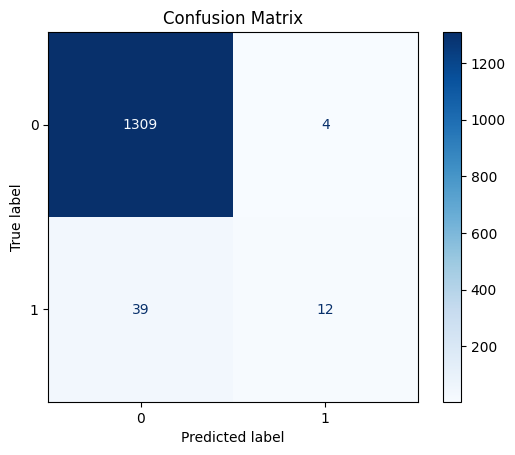

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.75      0.24      0.36        51

    accuracy                           0.97      1364
   macro avg       0.86      0.62      0.67      1364
weighted avg       0.96      0.97      0.96      1364



In [126]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Parameter Tuning
** There was no significant improvement

In [127]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, 
                           scoring='f1_weighted', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
y_pred_tuned = best_clf.predict(X_test)

# Evaluate the tuned model
print("F1 Score (Tuned Model):", f1_score(y_test, y_pred_tuned, average='weighted'))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.9628830204096683
F1 Score (Tuned Model): 0.9610186594869468
